In [9]:
import numpy as np
import pandas as pd 

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
hd=pd.read_csv("..\heart-disease.csv")

In [6]:
X=hd.drop("target",axis=1)
Y=hd["target"]

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
cross_val_score(clf,X,Y,cv=5)

array([0.80327869, 0.86885246, 0.78688525, 0.83333333, 0.73333333])

In [12]:
np.mean(cross_val_score(clf,X,Y,cv=5))

0.8315300546448088

In [18]:
y_prob=clf.predict_proba(X_test)
y_prob[:5]

array([[0.63, 0.37],
       [0.65, 0.35],
       [0.88, 0.12],
       [0.74, 0.26],
       [0.21, 0.79]])

In [47]:
Y_test[:10]

42     1
183    0
237    0
138    1
90     1
22     1
251    0
301    0
123    1
100    1
Name: target, dtype: int64

In [21]:
y_prob[:,1]

array([0.37, 0.35, 0.12, 0.26, 0.79, 0.74, 0.23, 0.03, 0.92, 0.76, 0.69,
       0.31, 0.05, 0.77, 0.81, 0.4 , 0.89, 0.72, 0.52, 0.73, 0.47, 0.51,
       0.08, 0.59, 0.88, 0.96, 0.67, 0.28, 0.58, 0.98, 0.28, 0.91, 0.16,
       0.03, 0.18, 0.36, 0.92, 0.42, 0.16, 0.96, 0.33, 0.07, 0.12, 0.06,
       0.11, 0.02, 0.16, 0.57, 0.02, 0.59, 0.04, 0.19, 0.69, 0.73, 0.37,
       0.59, 0.35, 0.9 , 0.38, 0.95, 0.08])

In [22]:
y_prob[:,0]

array([0.63, 0.65, 0.88, 0.74, 0.21, 0.26, 0.77, 0.97, 0.08, 0.24, 0.31,
       0.69, 0.95, 0.23, 0.19, 0.6 , 0.11, 0.28, 0.48, 0.27, 0.53, 0.49,
       0.92, 0.41, 0.12, 0.04, 0.33, 0.72, 0.42, 0.02, 0.72, 0.09, 0.84,
       0.97, 0.82, 0.64, 0.08, 0.58, 0.84, 0.04, 0.67, 0.93, 0.88, 0.94,
       0.89, 0.98, 0.84, 0.43, 0.98, 0.41, 0.96, 0.81, 0.31, 0.27, 0.63,
       0.41, 0.65, 0.1 , 0.62, 0.05, 0.92])

In [24]:
y_probs_postitive=y_prob[:,1]
y_probs_postitive[:10]

array([0.37, 0.35, 0.12, 0.26, 0.79, 0.74, 0.23, 0.03, 0.92, 0.76])

In [26]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,y_probs_postitive)

In [27]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03030303, 0.03030303, 0.06060606, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.12121212,
       0.12121212, 0.24242424, 0.24242424, 0.27272727, 0.33333333,
       0.36363636, 0.36363636, 0.42424242, 0.42424242, 0.51515152,
       0.60606061, 0.66666667, 0.6969697 , 0.75757576, 0.87878788,
       1.        ])

In [28]:
tpr

array([0.        , 0.03571429, 0.10714286, 0.14285714, 0.21428571,
       0.42857143, 0.42857143, 0.5       , 0.53571429, 0.53571429,
       0.60714286, 0.64285714, 0.75      , 0.82142857, 0.82142857,
       0.85714286, 0.85714286, 0.92857143, 0.92857143, 0.92857143,
       0.92857143, 0.96428571, 0.96428571, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

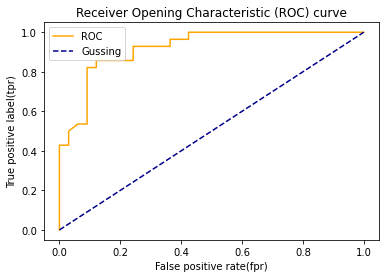

In [37]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Gussing")

    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive label(tpr)")
    plt.title("Receiver Opening Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

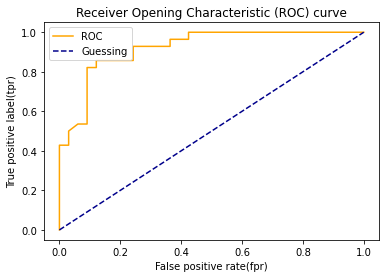

In [39]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """plots and ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model """
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power (baseline) 
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive label(tpr)")
    plt.title("Receiver Opening Characteristic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_postitive)

0.9204545454545454

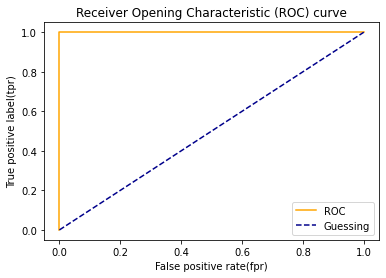

In [43]:
#create perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [44]:
roc_auc_score(Y_test,Y_test)

1.0

In [49]:
from sklearn.metrics import confusion_matrix

y_pred=clf.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[29,  4],
       [ 4, 24]], dtype=int64)

In [52]:
pd.crosstab(Y_test,y_pred,rownames=["Actual Label"],colnames=["predicted label"])

predicted label,0,1
Actual Label,,
0,29,4
1,4,24


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

